In [89]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import os 
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
diretorio = '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados_web_scraping/'
diretorio = os.path.dirname(diretorio)

print('subdiretorios = ', os.listdir(diretorio))

lista_subdirs = os.listdir(diretorio)

dic = {}

for subdir in lista_subdirs:
    dic[subdir] = os.path.join(diretorio, subdir)
    #dic.update((subdir, os.path.join(diretorio, subdir)))
    
    
print('\n dicionario: \n', dic)

subdiretorios =  ['street', 'sea', 'glacier', 'forest', 'mountain', 'buildings']

 dicionario: 
 {'street': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados_web_scraping/street', 'sea': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados_web_scraping/sea', 'glacier': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados_web_scraping/glacier', 'forest': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados_web_scraping/forest', 'mountain': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados_web_scraping/mountain', 'buildings': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados_web_scraping/buildings'}


In [29]:
print('QUANTIDADE DE IMANGES COM DOWNLOAD POR MEIO DO WEBSCRAPING')
for subdir in dic.keys():
    print(subdir, len(os.listdir(dic[subdir])))

QUANTIDADE DE IMANGES COM DOWNLOAD POR MEIO DO WEBSCRAPING
street 474
sea 949
glacier 229
forest 854
mountain 925
buildings 942


In [21]:
#tipo = str(input('digite qual foto subdir deseja ver (street, sea, glacier, forest, mountain, buldings): '))
lista_fotos = []
indices = [0, 1, 2]

for caminho in dic.keys():

    fotos = os.listdir(dic[caminho])
    
    for indice in indices:
    
        caminho_foto = os.path.join(dic[caminho], fotos[indice])
        lista_fotos.append(caminho_foto)

street


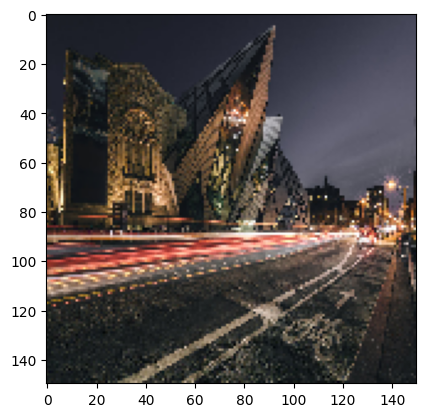

street


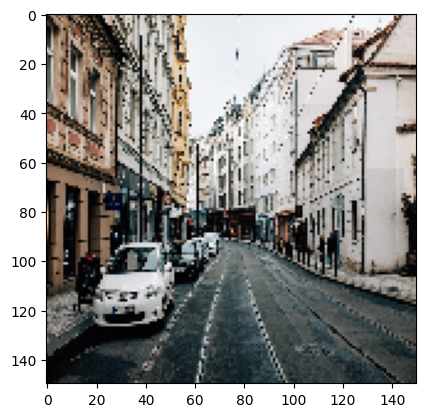

street


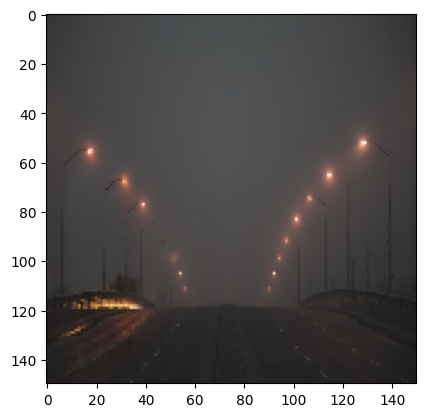

sea


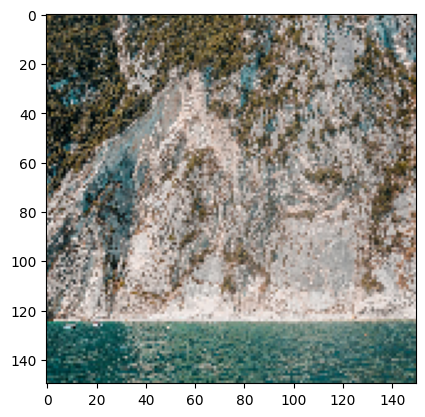

sea


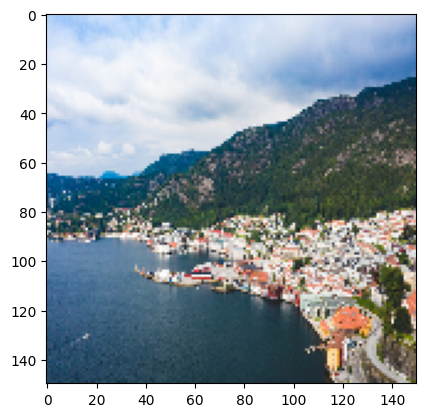

sea


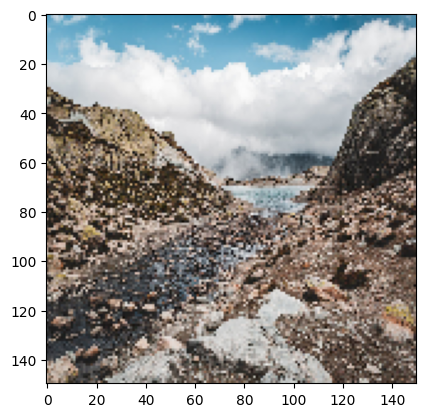

glacier


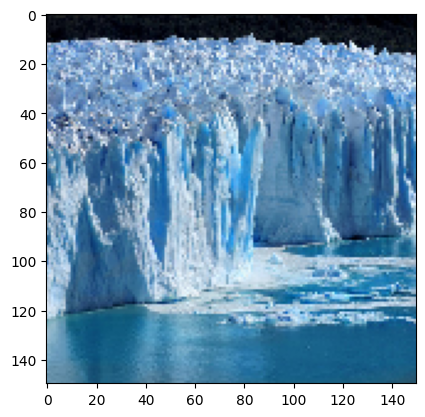

glacier


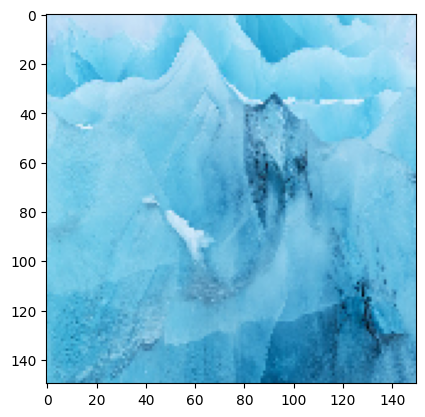

glacier


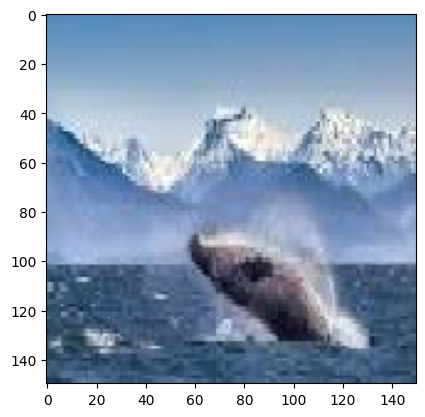

forest


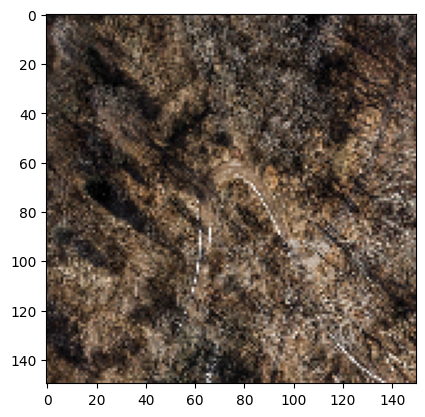

forest


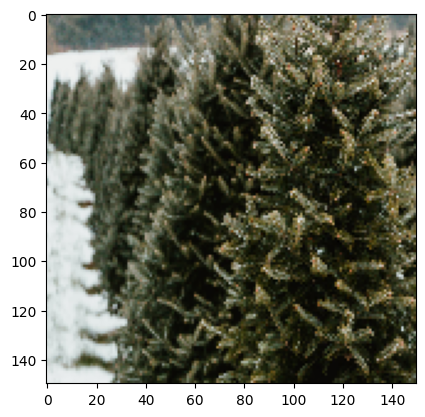

forest


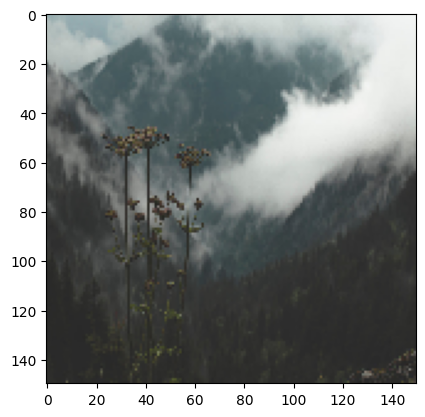

mountain


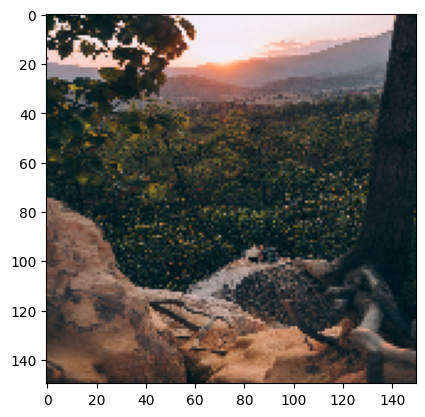

mountain


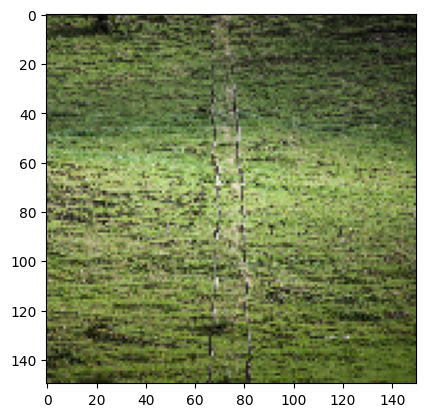

mountain


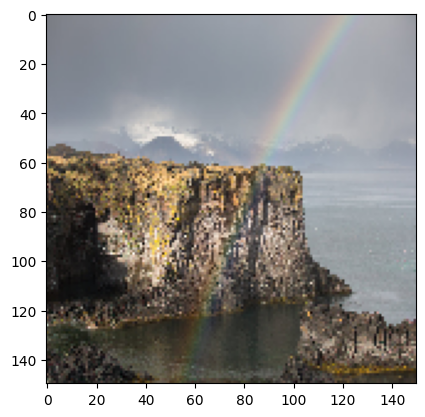

buildings


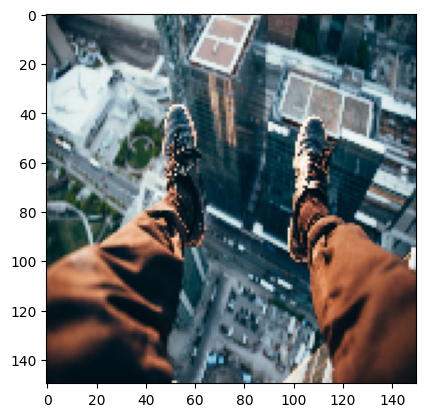

buildings


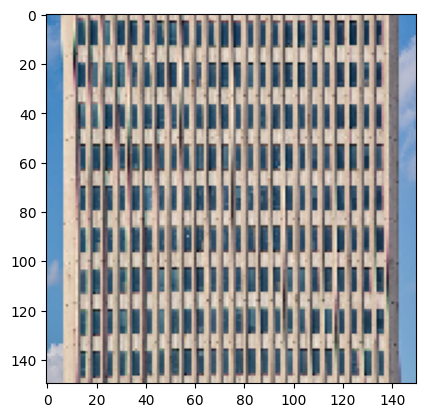

buildings


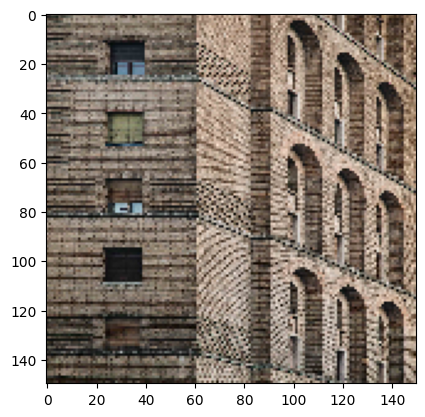

In [25]:
for i in range(0, len(lista_fotos),1):
    img = load_img(lista_fotos[i], target_size = (150,150))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    print(lista_fotos[i].split('/')[-2])
    plt.imshow(img_array)
    plt.show()

In [53]:
diretorio = '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/'

#criando variável diretorio train e validation 
diretorio_train = os.path.join(diretorio, 'seg_train/seg_train')
diretorio_validation = os.path.join(diretorio, 'seg_test/seg_test')

dicio_train = {}
dicio_validation = {}

all_subdir = os.listdir(diretorio_train)

for subdir in all_subdir:
    dicio_train[subdir] = os.path.join(diretorio_train, subdir)

for subdir in all_subdir:
    dicio_validation['seg_test' + '_' + subdir] = os.path.join(diretorio_validation, subdir)

In [36]:
dicio_train

{'street': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/street',
 'sea': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/sea',
 'glacier': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/glacier',
 'forest': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/forest',
 'mountain': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/mountain',
 'buildings': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/buildings'}

In [48]:
#copiando arquivos 
for subdir in dic.keys():
    
    fotos = os.listdir(dic[subdir])
    
    for foto_name in fotos:
        
        
        foto_caminho_origem = os.path.join(dic[subdir], foto_name)
        foto_caminho_destino = os.path.join(dicio_train[subdir], foto_name)
        
        shutil.copyfile(foto_caminho_origem, foto_caminho_destino)

In [50]:
print('NOVA QUANTIDADE DE IMAGENS POR CLASSE - TRAIN')
for subdir in dicio_train.keys():
    print(subdir, '=' , len(os.listdir(dicio_train[subdir])))

NOVA QUANTIDADE DE IMAGENS POR CLASSE - TRAIN
street = 2855
sea = 3222
glacier = 2633
forest = 3125
mountain = 3437
buildings = 3133


# tensorflow

In [75]:
#Instanciando ImageDataGenerator para dados de treino
train_datagen = ImageDataGenerator(rescale = 1.0/255.0)

#gerando dados de treino (com as imagens contidas no diretorio de treino)
train_generator = train_datagen.flow_from_directory(diretorio_train,
                                                    target_size = (150,150),
                                                    batch_size = 143)

#Instanciando ImageDataGenerator para dados de validacao
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

#gerando dados de validacao (com as imagens contidas no diretorio de validacao)
validation_generator = validation_datagen.flow_from_directory(diretorio_validation,
                                                              target_size = (150,150), batch_size = 23)

Found 18405 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [61]:
3000/128

23.4375

In [95]:
#criando rede neraul 

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3) ,input_shape = (150,150, 3), activation = 'relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])

In [96]:
from tensorflow.keras.optimizers import RMSprop

In [97]:
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = RMSprop(lr = 0.0001))

/home/rafael/Python/env/tf_image_classification/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [98]:


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if((logs.get('accuracy') - logs.get('val_accuracy')) > 0.1):
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit_generator(train_generator, 
                              epochs = 15,
                              steps_per_epoch = 128,
                              validation_data = validation_generator,
                              validation_steps = 128,
                              verbose = 1, 
                              callbacks = [callbacks])

/tmp/ipykernel_89695/2270232797.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/15
128/128 [==============================] - 186s 1s/step - loss: 1.5585 - accuracy: 0.3816 - val_loss: 1.2855 - val_accuracy: 0.5173
Epoch 2/15
128/128 [==============================] - 192s 1s/step - loss: 1.3217 - accuracy: 0.4983 - val_loss: 1.1673 - val_accuracy: 0.5774
Epoch 3/15
128/128 [==============================] - 180s 1s/step - loss: 1.2240 - accuracy: 0.5608 - val_loss: 1.0798 - val_accuracy: 0.6192
Epoch 4/15
128/128 [==============================] - 178s 1s/step - loss: 1.1502 - accuracy: 0.5906 - val_loss: 1.0412 - val_accuracy: 0.6318
Epoch 5/15
128/128 [==============================] - 190s 1s/step - loss: 1.0951 - accuracy: 0.6033 - val_loss: 1.0071 - val_accuracy: 0.6277
Epoch 6/15
128/128 [==============================] - 188s 1s/step - loss: 1.0533 - accuracy: 0.6201 - val_loss: 0.9297 - val_accuracy: 0.6569
Epoch 7/15
128/128 [==============================] - 179s 1s/step - loss: 1.0120 - accuracy: 0.6284 - val_loss: 0.9140 - val_accuracy: 0.6722

In [93]:
history.history['accuracy']

[0.40849852561950684]

<AxesSubplot: >

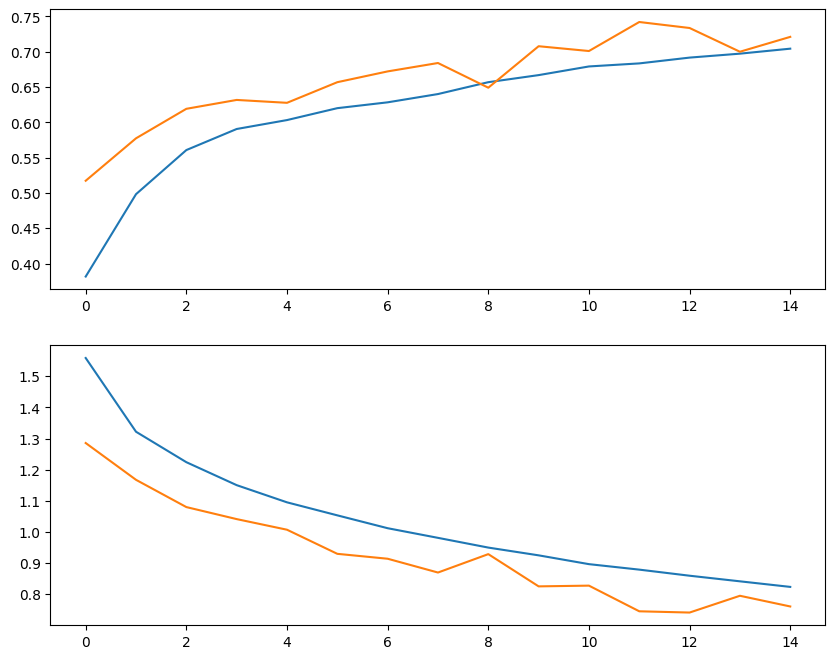

In [99]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

epoch = range(len(acc))

fig, ax = plt.subplots(nrows = 2, figsize = (10, 8))

sns.lineplot(x = epoch, y = acc, ax = ax[0])
sns.lineplot(x = epoch, y = val_acc, ax = ax[0])

sns.lineplot(x = epoch, y = loss, ax = ax[1])
sns.lineplot(x = epoch, y = val_loss, ax = ax[1])